#### Step 1: Importing all of the Libraries

In [1]:
# Manual NLTK Setup

# === IMPORT LIBRARIES ===
import pandas as pd
import re
from collections import Counter
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import os

# === STEP 1: DEFINE A LOCAL DATA PATH ===
# We create a folder named 'nltk_data' right here in our project folder.
local_data_path = os.path.join(os.getcwd(), 'nltk_data')
if not os.path.exists(local_data_path):
    os.makedirs(local_data_path)
print(f"NLTK data will be stored in: {local_data_path}")

# === STEP 2: TELL NLTK TO USE THIS PATH ===
# We are manually overriding NLTK's default search paths.
nltk.data.path.append(local_data_path)
print("Added local path to NLTK's search directory.")

# === STEP 3: FORCE DOWNLOAD TO THIS SPECIFIC PATH ===
# The 'download_dir' argument ensures it goes to the right place.
print("Downloading NLTK packages to the local directory...")
nltk.download('punkt', download_dir=local_data_path)
nltk.download('stopwords', download_dir=local_data_path)
nltk.download('averaged_perceptron_tagger_eng', download_dir=local_data_path)
nltk.download('punkt_tab', download_dir=local_data_path)
print("NLTK packages download process completed.")

# Set plot style
sns.set()

NLTK data will be stored in: /Users/fariya/Desktop/Git_Projects/20th-century/nltk_data
Added local path to NLTK's search directory.
NLTK packages download process completed.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fariya/Desktop/Git_Projects/20th-
[nltk_data]     century/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fariya/Desktop/Git_Projects/20th-
[nltk_data]     century/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/fariya/Desktop/Git_Projects/20th-
[nltk_data]     century/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/fariya/Desktop/Git_Projects/20th-
[nltk_data]     century/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Step 2: Loading Data

In [2]:
# Load the list of countries from the CSV file.
try:
    countries_df = pd.read_csv('countries_list_20th_century_1.5.csv')
    country_list = countries_df['country_name'].tolist()
    print(f"Successfully loaded {len(country_list)} countries from 'countries_list_20th_century_1.5.csv'.")
except FileNotFoundError:
    print("Error: 'countries_list_20th_century_1.5.csv' not found. Please ensure the file is in the same directory as this notebook.")
    country_list = [] # Create an empty list to avoid errors later.

# Load the raw text from the events page .txt file.
# The .replace('\n', ' ') is used to join all lines into one single block of text.
try:
    with open('20th_century_key_events.txt', 'r', encoding='utf-8') as file:
        raw_text = file.read().replace('\n', ' ')
    print("Successfully loaded the raw text from '20th_century_key_events.txt'.")
except FileNotFoundError:
    print("Error: '20th_century_key_events.txt' not found.")
    raw_text = "" # Create an empty string to avoid errors later.

Successfully loaded 209 countries from 'countries_list_20th_century_1.5.csv'.
Successfully loaded the raw text from '20th_century_key_events.txt'.


#### Step 3: Tokenization

In [3]:
# Sentence tokenization 
tokenized_sent_raw = sent_tokenize(raw_text)
print(tokenized_sent_raw)

['The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit] World at the beginning of the century[edit] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.', 'The Scramble for Africa continued in the 1900s and resulted in wars and genocide across the continent.', 'The atrocities in the Congo Free State shocked the civilized world.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in 

In [4]:
# Tokenize the raw text into individual words
# The word_tokenize function is more sophisticated than a simple .split()
tokenized_words_raw = word_tokenize(raw_text)
print(f"Tokenized the text into {len(tokenized_words_raw)} words.")

Tokenized the text into 21745 words.


In [5]:
# Calculate the frequency distribution of all tokens
freq_dist_raw = FreqDist(tokenized_words_raw)
print (freq_dist_raw)

<FreqDist with 4710 samples and 21745 outcomes>


In [6]:
# Get the 10 most common tokens
most_common_raw = freq_dist_raw.most_common(10)
print("\nTop 10 most common tokens (before cleaning):")
print(most_common_raw)


Top 10 most common tokens (before cleaning):
[('.', 1626), ('the', 1116), (',', 975), ('of', 612), ('and', 407), ('to', 325), ('The', 319), ('[', 309), (']', 309), ('in', 298)]


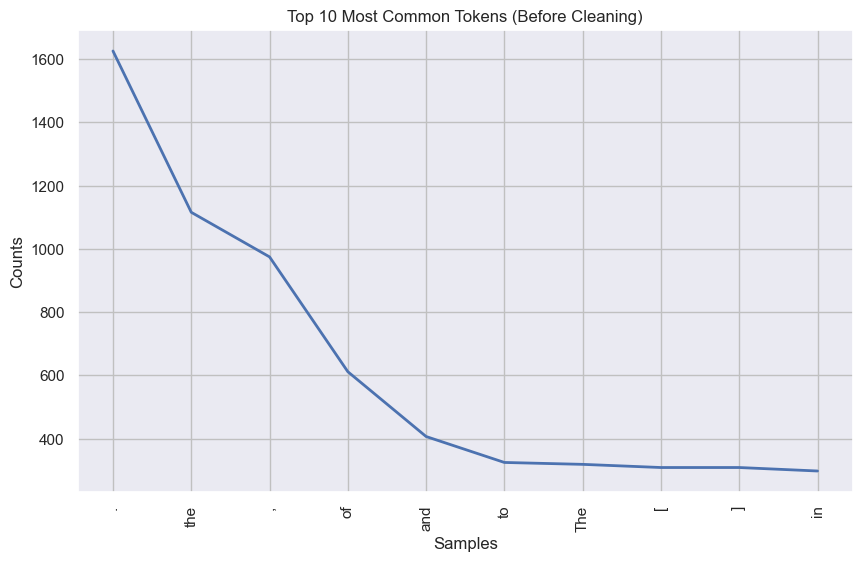

In [7]:
# Create the bar plot
plt.figure(figsize=(10, 6))
freq_dist_raw.plot(10, title='Top 10 Most Common Tokens (Before Cleaning)')
plt.show()

#### Step 4: Removing stop words and punctuation marks

In [8]:
# Get the standard list of English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Create an empty list to hold our cleaned words
cleaned_words = []

# Loop through every word in our original tokenized list
for word in tokenized_words_raw:
    # Convert the word to lowercase
    word_lower = word.lower()
    
    # Check if the word is alphabetic (to remove punctuation) AND if it's not a stop word
    if word_lower.isalpha() and word_lower not in stop_words:
        cleaned_words.append(word_lower)

print(f"Text after removing stop words and punctuation: {len(cleaned_words)} words.")

Text after removing stop words and punctuation: 9503 words.


In [9]:
# Calculate the new frequency distribution on the cleaned words
freq_dist_cleaned = FreqDist(cleaned_words)

# Get the 10 most common cleaned words
most_common_cleaned = freq_dist_cleaned.most_common(10)
print("\nTop 10 most common tokens (after cleaning):")
print(most_common_cleaned)


Top 10 most common tokens (after cleaning):
[('december', 225), ('retrieved', 208), ('war', 198), ('world', 111), ('history', 70), ('soviet', 57), ('new', 54), ('first', 53), ('hitler', 51), ('germany', 41)]


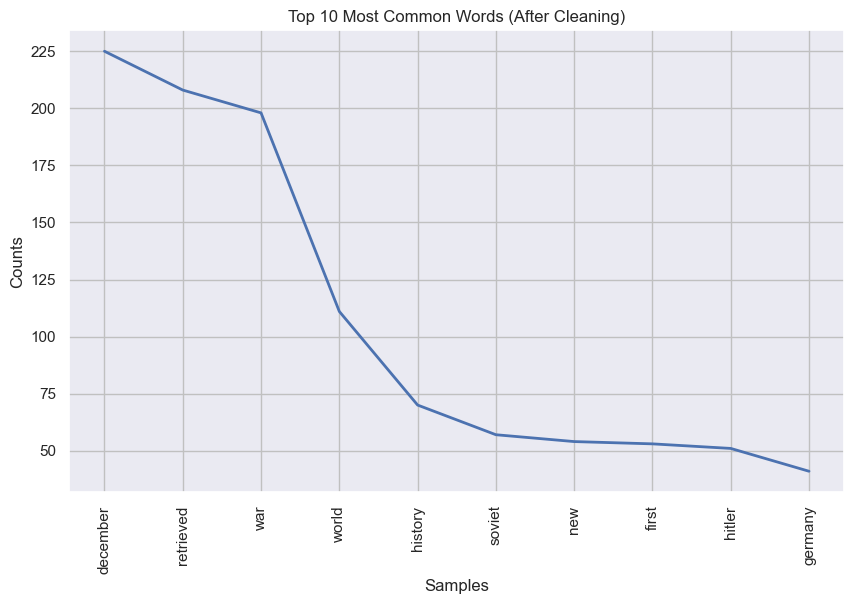

In [10]:
# Create the new bar plot
plt.figure(figsize=(10, 6))
freq_dist_cleaned.plot(10, title='Top 10 Most Common Words (After Cleaning)')
plt.show()

#### Step 5: Create a tags list using TextBlob

In [11]:
# TextBlob works on strings, so we need to join our list of cleaned words back together.
# ' '.join(...) puts a space between each word.
text_for_tagging = ' '.join(cleaned_words)

# Create a TextBlob object from our cleaned text.
blob_object = TextBlob(text_for_tagging)

# Perform the POS tagging. This will return a list of (word, tag) tuples.
pos_tags = blob_object.tags

# Print the first 10 tags to see what the output looks like.
print("First 10 POS tags:")
print(pos_tags[:10])

First 10 POS tags:
[('century', 'NN'), ('changed', 'VBD'), ('world', 'NN'), ('unprecedented', 'JJ'), ('ways', 'NNS'), ('world', 'NN'), ('wars', 'NNS'), ('sparked', 'VBD'), ('tension', 'NN'), ('countries', 'NNS')]


#### Step 6: Create a list of the Top 10 POS tags for words

In [12]:
# We only need the second item (the tag) from each tuple in our pos_tags list.
# This list comprehension efficiently extracts all the tags.
tags_only = [tag for word, tag in pos_tags]

# Use FreqDist to count the occurrences of each tag.
tag_counts = FreqDist(tags_only)

# Print the 10 most common tags and their counts.
print("Top 10 most common Part-of-Speech tags:")
print(tag_counts.most_common(10))

Top 10 most common Part-of-Speech tags:
[('NN', 3578), ('JJ', 2169), ('NNS', 1029), ('VBD', 712), ('RB', 431), ('VBP', 361), ('VBG', 268), ('VBN', 245), ('IN', 154), ('VB', 116)]


#### Step 7: Plot the POS tags list in a bar chart

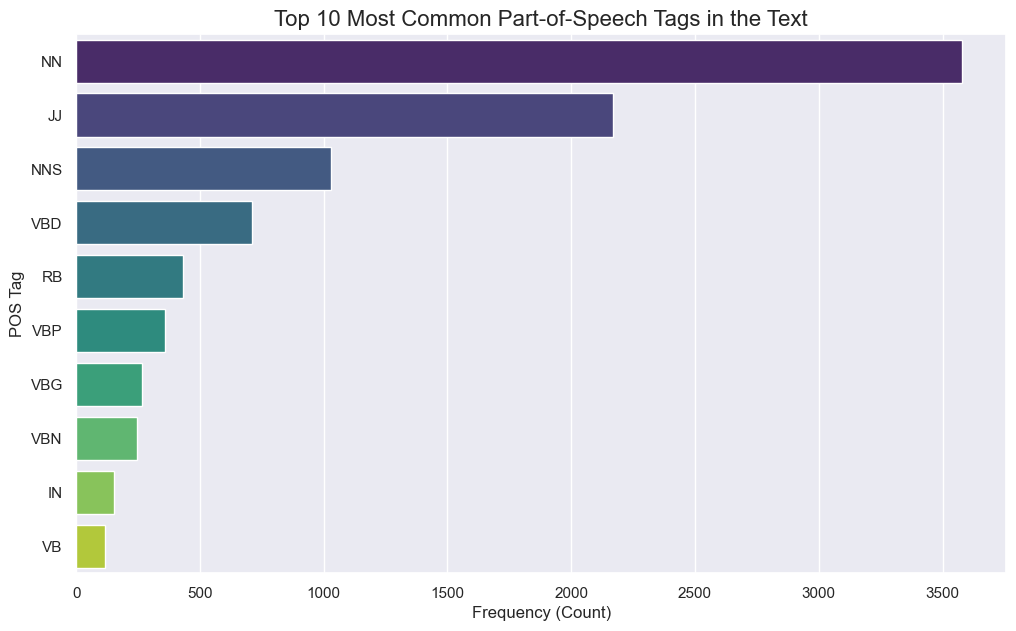

In [13]:
# Convert the list of (tag, count) tuples into a pandas DataFrame
top_10_tags_df = pd.DataFrame(tag_counts.most_common(10), columns=['POS_Tag', 'Count'])

# Create the HORIZONTAL bar plot using seaborn.
plt.figure(figsize=(12, 7)) # Set the figure size.

# Add x and y, and hue/legend arguments.
sns.barplot(x='Count', y='POS_Tag', data=top_10_tags_df, palette='viridis', hue='POS_Tag', legend=False)

# Add titles and labels for clarity.
plt.title('Top 10 Most Common Part-of-Speech Tags in the Text', fontsize=16)
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('POS Tag', fontsize=12)

# Show the plot.
plt.show()

#### Step 8: Create bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

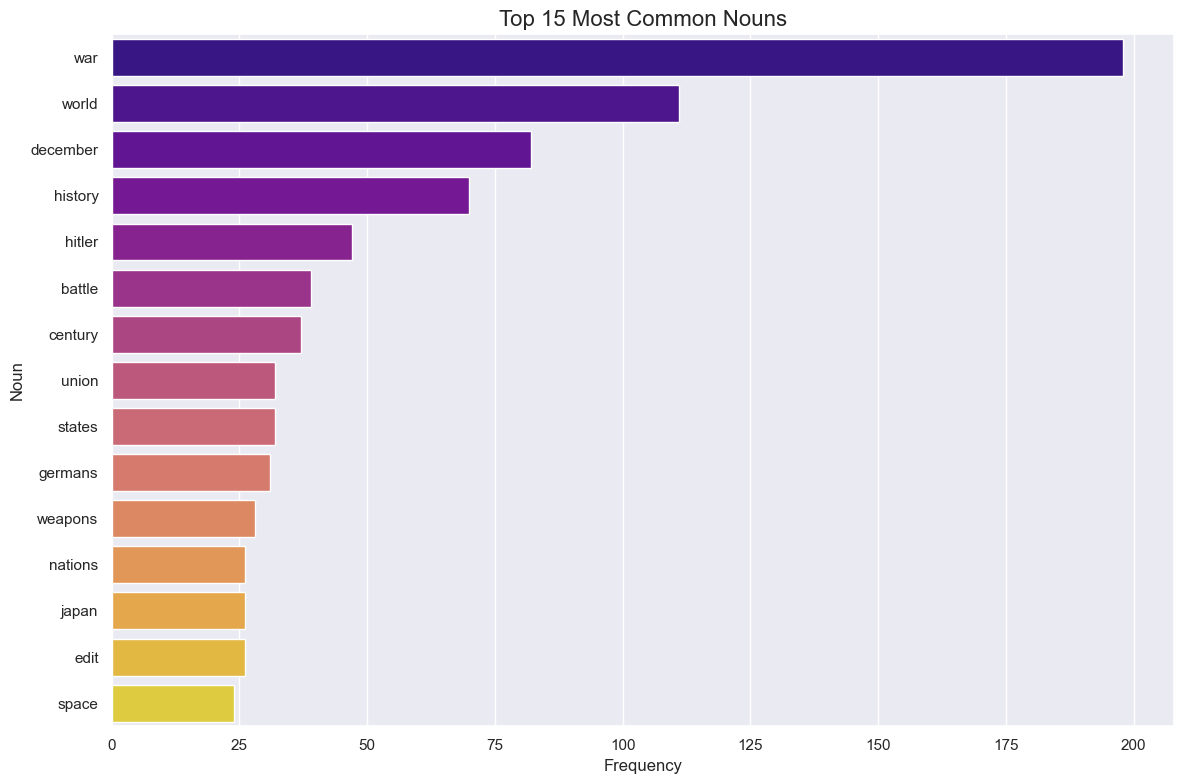

In [14]:
# First, create a DataFrame from our full list of (word, tag) tuples for easy filtering.
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'POS_Tag'])

# --- 1. NOUNS ---
# Filter for all tags that start with 'NN' (NN, NNS, NNP, NNPS).
nouns_df = pos_df[pos_df['POS_Tag'].str.startswith('NN')]
# Count the occurrences of each noun.
top_15_nouns = nouns_df['Word'].value_counts().head(15)

# --- Create the HORIZONTAL Bar Plot ---
plt.figure(figsize=(12, 8))

# We assign the y-variable (top_15_nouns.index) to hue.
sns.barplot(x=top_15_nouns.values, y=top_15_nouns.index, palette='plasma', orient='h', hue=top_15_nouns.index, legend=False)

# Add titles and labels.
plt.title('Top 15 Most Common Nouns', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Noun', fontsize=12)

plt.tight_layout()
plt.show()

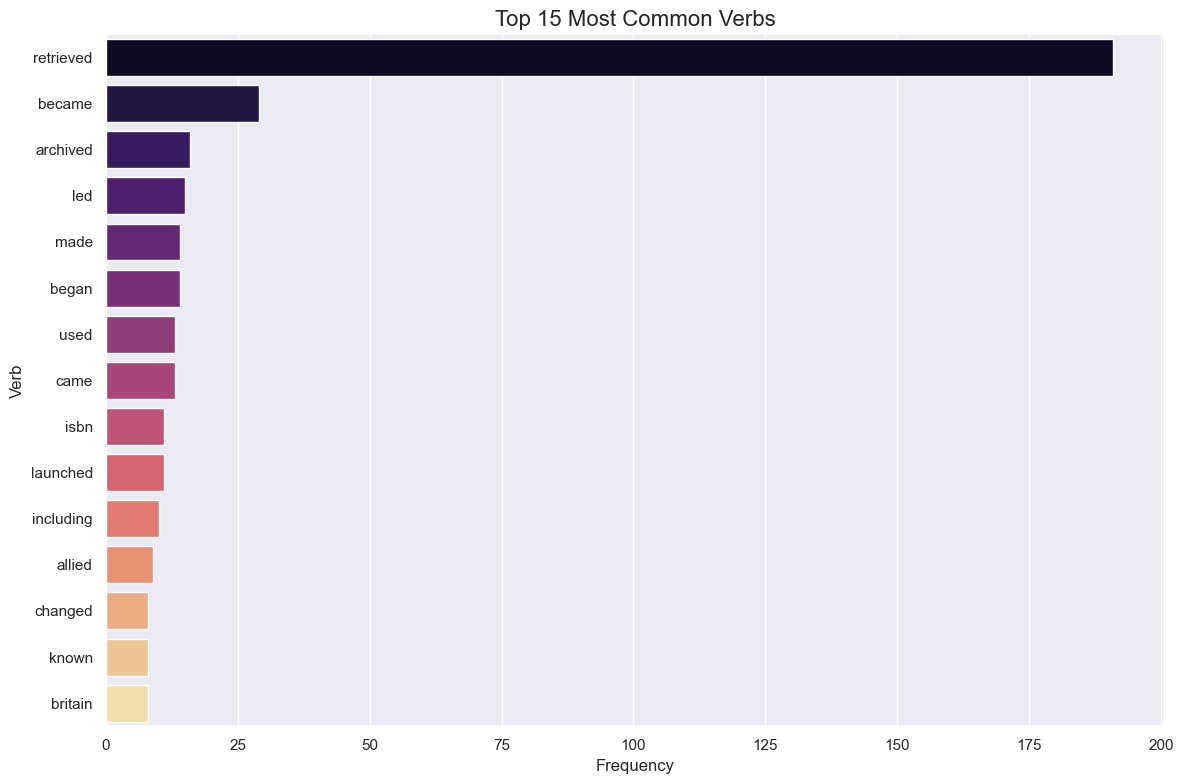

In [15]:
# --- 2. VERBS ---
# Filter for all tags that start with 'VB' (VB, VBD, VBG, VBN, VBP, VBZ).
verbs_df = pos_df[pos_df['POS_Tag'].str.startswith('VB')]
# Count the occurrences of each verb.
top_15_verbs = verbs_df['Word'].value_counts().head(15)

# --- Create the HORIZONTAL Bar Plot ---
plt.figure(figsize=(12, 8))

# Add x/y, set orient='h', and hue/legend arguments.
# We'll use the 'magma' palette for variety.
sns.barplot(x=top_15_verbs.values, y=top_15_verbs.index, palette='magma', orient='h', hue=top_15_verbs.index, legend=False)

# Add titles and labels.
plt.title('Top 15 Most Common Verbs', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Verb', fontsize=12)

plt.tight_layout()
plt.show()

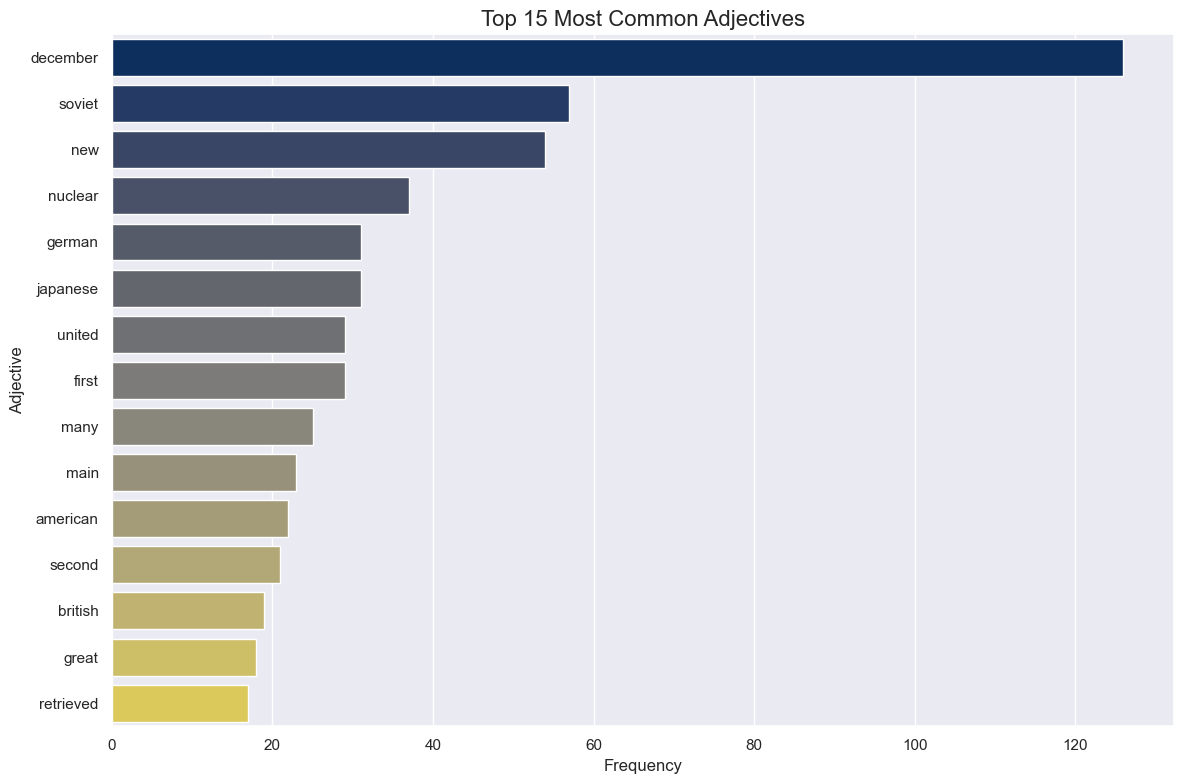

In [16]:
# --- 3. ADJECTIVES ---
# Filter for all tags that start with 'JJ' (JJ, JJR, JJS).
adjectives_df = pos_df[pos_df['POS_Tag'].str.startswith('JJ')]
# Count the occurrences of each adjective.
top_15_adjectives = adjectives_df['Word'].value_counts().head(15)

# --- Create the HORIZONTAL Bar Plot ---
plt.figure(figsize=(12, 8))

# Add x/y, set orient='h', and hue/legend arguments.
# We'll use the 'cividis' palette for this one.
sns.barplot(x=top_15_adjectives.values, y=top_15_adjectives.index, palette='cividis', orient='h', hue=top_15_adjectives.index, legend=False)

# Add titles and labels.
plt.title('Top 15 Most Common Adjectives', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Adjective', fontsize=12)

plt.tight_layout()
plt.show()

#### Step 9: Create a dataframe with the countries and the number of times they’re mentioned

In [17]:
# --- Part 1: Build a Comprehensive Search Dictionary for All Countries ---
import pycountry

print("Building a comprehensive search dictionary for all countries...")
# This dictionary will map an official country name to a list of its possible search terms.
search_dictionary = {}

for country_name in country_list:
    search_terms = set() # Use a set to automatically handle duplicate terms.

    # Add the simple lowercase name (e.g., 'germany')
    search_terms.add(country_name.lower())
    
    # Add the last word as a potential alias (e.g., 'united states' -> 'states')
    search_terms.add(country_name.lower().split()[-1])

    # Use pycountry to find more aliases, like adjectival forms.
    # The try/except block handles cases where a country isn't in the pycountry database.
    try:
        country_data = pycountry.countries.get(name=country_name)
        if country_data:
            # Check for and add the adjectival form (e.g., 'german', 'british')
            if hasattr(country_data, 'adjective'):
                search_terms.add(country_data.adjective.lower())
    except LookupError:
        pass # This country name was not found in pycountry, so we just move on.
        
    # Add the final list of search terms to our dictionary.
    search_dictionary[country_name] = list(search_terms)

print("Search dictionary built successfully.")

Building a comprehensive search dictionary for all countries...
Search dictionary built successfully.


In [18]:
# --- Part 2: Count Mentions Using the Dictionary ---
print("Counting mentions for all countries using the new dictionary...")
country_mentions = {}

# Initialize all country counts to 0.
for country_name in country_list:
    country_mentions[country_name] = 0

# Loop through every word in our cleaned text.
for word in cleaned_words:
    # Check this word against every country's list of search terms.
    for official_name, search_terms in search_dictionary.items():
        if word in search_terms:
            country_mentions[official_name] += 1 # Increment the count for the official name.

Counting mentions for all countries using the new dictionary...


In [19]:
# --- Part 3: Create and Display the Final DataFrame ---
# Filter out countries that were never mentioned.
final_counts = {country: count for country, count in country_mentions.items() if count > 0}

# Convert the final counts to a DataFrame and sort it.
country_mentions_df = pd.DataFrame(list(final_counts.items()), columns=['Country', 'Mentions'])
country_mentions_df = country_mentions_df.sort_values(by='Mentions', ascending=False)

# Display the top 15 most mentioned countries to verify the result.
print("\nTop 15 Most Mentioned Countries:")
print(country_mentions_df.head(15))


Top 15 Most Mentioned Countries:
                 Country  Mentions
23              Germany         41
70        United States         33
35                Japan         33
64         South Africa         23
37         Korea, North         21
22                France        17
38         Korea, South         15
33                Italy         14
71               Vietnam        13
56               Poland         13
58               Russia          9
29                India          9
63      Solomon Islands          8
72         Cook Islands          8
45     Marshall Islands          8


In [20]:
country_mentions_df

,Country,Mentions
23,Germany,41
70,United States,33
35,Japan,33
64,South Africa,23
37,"Korea, North",21
...,...,...
53,Panama,1
44,Luxembourg,1
46,Mexico,1
47,Mongolia,1


#### Step 10: Create a plot showing the frequency of the number of times countries are mentioned 

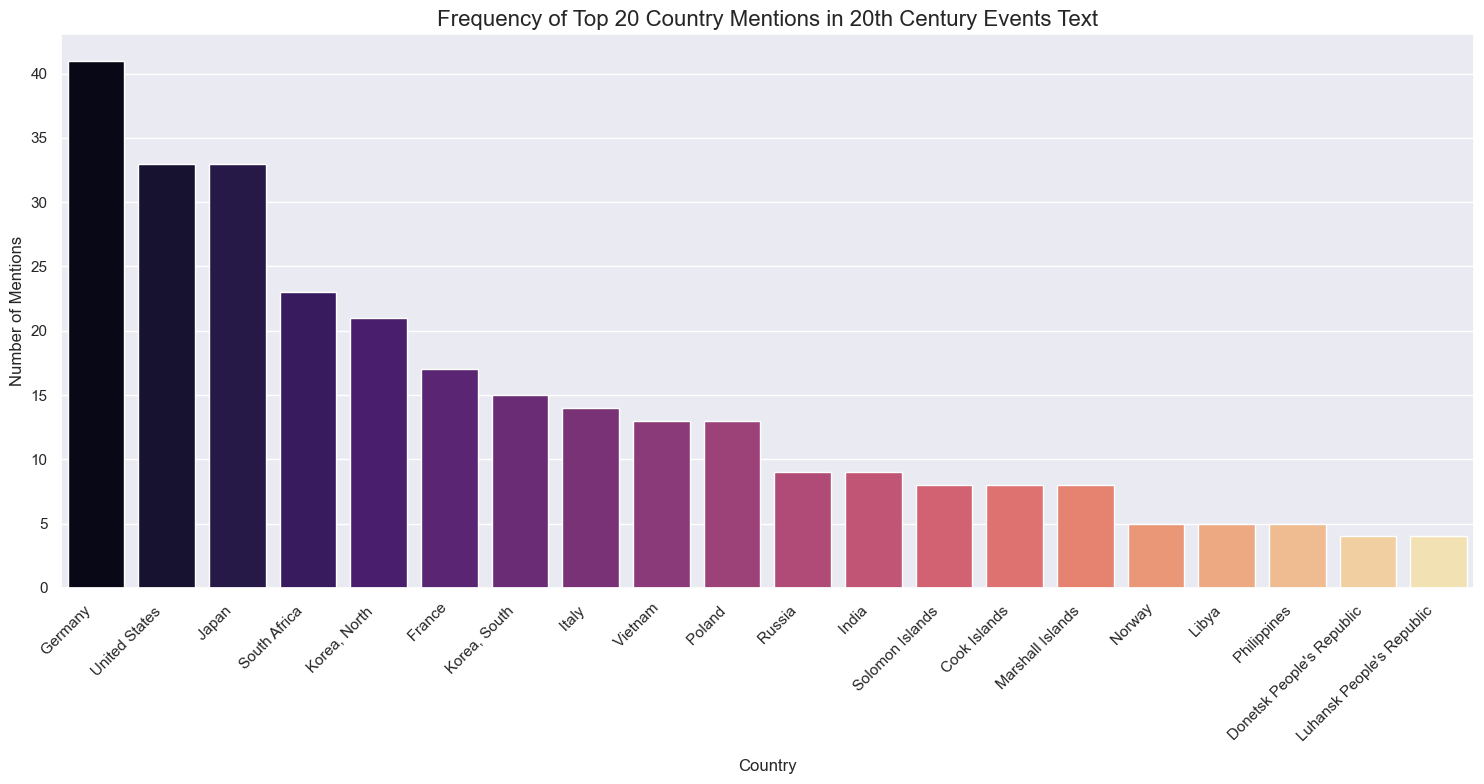

In [21]:
# We will plot the top 20 most mentioned countries for a readable chart.
# We already have our sorted 'country_mentions_df' from the previous cell.
top_20_countries = country_mentions_df.head(20)

# Create the bar plot using seaborn.
plt.figure(figsize=(15, 8))

# We've added the palette, hue, and legend arguments.
sns.barplot(x='Country', y='Mentions', data=top_20_countries, palette='magma', hue='Country', legend=False)

# Add titles and labels for clarity.
plt.title('Frequency of Top 20 Country Mentions in 20th Century Events Text', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart visualizes the frequency of the top 20 most mentioned countries in the scraped text about 20th-century events. The results provide several clear insights into the focus of the historical narrative.

**Key Observations:**

*   **Dominance of World War II Powers:** The most prominent finding is the clear dominance of **Germany**, the **United States**, and **Japan**. Their high frequency of mentions strongly reflects the central role these nations played in World War II, which was arguably the most defining event of the century.

*   **Cold War and Regional Conflicts:** The separate, high counts for both **"Korea, North"** and **"Korea, South"** immediately highlight the significance of the Korean War and the lasting geopolitical division of the peninsula. Similarly, the inclusion of **Vietnam** points to another major Cold War-era conflict that drew global attention.

*   **European Context:** Major European powers like **France**, **Italy**, and **Poland** feature prominently, as expected, due to their involvement in both World Wars and other significant European political events.

*   **Interesting Inclusions and Potential Biases:** It is notable to see entities like the **"Donetsk People's Republic"** and **"Luhansk People's Republic"** in the top 20. As these were declared in the 21st century, their appearance suggests the source text links them directly to historical events rooted in the 20th century, likely the collapse of the Soviet Union. This is a fascinating point for further investigation.

**Conclusion for the Project:**

This frequency analysis is an excellent foundation for our network graph. The countries at the top of this chart (Germany, USA, Japan) will almost certainly form the central and most connected "nodes" in our network. The next step of the project will be to move beyond simple frequency counts and start identifying the direct relationships and interactions *between* these nations to build the network edges.

## Bonus Task: Sentiment Analysis

### My Hypothesis

Before running the sentiment analysis, I have the following expectations for the scores:

*   **Polarity:** The text covers numerous wars (WWI, WWII, Cold War), conflicts, and political tensions. Therefore, the overall theme is quite negative. However, Wikipedia's writing style is objective and factual, not emotional. Because of this neutral tone, I expect the polarity score to be **slightly negative, but very close to zero**. My prediction is a score between **-0.1 and 0.05**.

*   **Subjectivity:** As this is an encyclopedic article aiming to state facts, the subjectivity should be relatively low. It will not be zero, as language choice itself introduces some subjectivity, but it should be far from a personal opinion piece. I expect the subjectivity score to be **below 0.5**, likely in the **0.3 to 0.45 range**.

In [22]:
sentiment_blob = TextBlob(raw_text)

# Calculate the sentiment.
sentiment_scores = sentiment_blob.sentiment

# Extract the polarity and subjectivity into their own variables.
polarity = sentiment_scores.polarity
subjectivity = sentiment_scores.subjectivity

# Print the results in a clear, readable format.
print("--- Sentiment Analysis Results ---")
print(f"Polarity Score: {polarity:.4f}")
print(f"Subjectivity Score: {subjectivity:.4f}")

--- Sentiment Analysis Results ---
Polarity Score: 0.0586
Subjectivity Score: 0.3742


My hypothesis was largely correct.

*   For **polarity**, I predicted a score very close to zero, and the actual score of **+0.0586** confirms this. It is slightly positive rather than slightly negative, which is interesting. It suggests that despite covering many conflicts, the overall language of the Wikipedia article may contain slightly more positive or neutral phrasing (e.g., words like "development," "agreement," "liberation") than overtly negative phrasing.

*   For **subjectivity**, my prediction was very accurate. The score of **0.3742** falls directly within the 0.3 to 0.45 range I anticipated, confirming the factual and objective nature of the text.

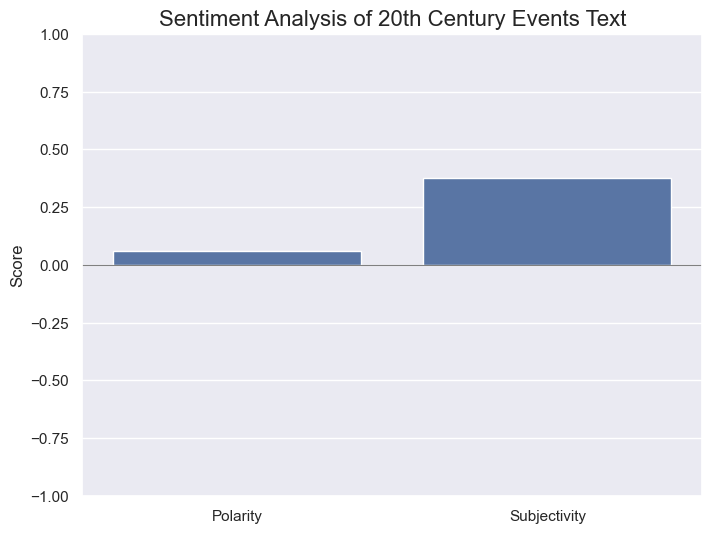

In [23]:
# We need to use the 'polarity' and 'subjectivity' variables we created in the analysis step.
sentiment_df = pd.DataFrame({
    'Metric': ['Polarity', 'Subjectivity'],
    'Score': [polarity, subjectivity]
})

# Create the bar plot.
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Metric', y='Score', data=sentiment_df)

# Add a horizontal line at y=0 to represent the neutral point for polarity.
ax.axhline(0, color='grey', linewidth=0.8)

# Set the y-axis limits to make the polarity score's position clear.
plt.ylim(-1, 1)

# Add titles and labels.
plt.title('Sentiment Analysis of 20th Century Events Text', fontsize=16)
plt.xlabel('')
plt.ylabel('Score', fontsize=12)

# Show the plot.
plt.show()